In [1]:
pwd

'/mmfs1/data/aglinska/BC-MRI-ADHD/Data'

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.colors as mcolors

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [174]:
# VALUES AS STRINGS LEADS TO BAD STUFF
df = pd.read_csv('df_all.csv')
df['Handedness'] = pd.to_numeric(df['Handedness'],errors='coerce') # first of many..
df.loc[df['DX'] == 'pending','DX'] = '4' # Turn 'pernding in to 4'
df['DX'] = pd.to_numeric(df['DX'],errors='coerce') # first of many..
df['Gender'] = pd.to_numeric(df['Gender'],errors='coerce') # first of many..

df

,Subject,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,...,Full2 IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID
0,0,26001.0,2,1.0,16.92,1.0,4,pending,pending,pending,...,NaN,120.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,1,26002.0,2,1.0,15.68,1.0,4,pending,pending,pending,...,NaN,107.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2,2,26004.0,2,0.0,14.99,1.0,4,pending,pending,pending,...,NaN,125.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,3,26005.0,2,0.0,15.16,1.0,4,pending,pending,pending,...,NaN,126.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,4,26009.0,2,1.0,16.91,0.0,4,pending,pending,pending,...,NaN,97.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,712,16015.0,7,1.0,11.70,1.0,0,NaN,NaN,NaN,...,-999.0,108.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
713,713,16035.0,7,1.0,13.94,1.0,0,NaN,NaN,NaN,...,-999.0,113.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
714,714,16023.0,7,0.0,12.51,0.0,0,NaN,NaN,NaN,...,110.0,107.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
715,715,16054.0,7,1.0,16.05,1.0,0,NaN,NaN,NaN,...,-999.0,105.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN


In [106]:
#all([str(type(val))=="<class 'numpy.float64'>" for val in df['Gender'].values])

In [35]:
len(df) # Number of rows total

717

In [6]:
'Number of female subjects = {}, Number of male subjects = {},'.format(df['Gender'].value_counts()[0.0], df['Gender'].value_counts()[1.0])


'Number of female subjects = 315, Number of male subjects = 401,'

In [47]:
#df['Gender'].isna().sum()
#pd.unique(df['Gender'])

In [7]:
'Number of ADHD subjects = {}, Number of typically developing subjects = {}'.format(df['DX'].value_counts()[1]+df['DX'].value_counts()[2]+df['DX'].value_counts()[3], df['DX'].value_counts()[0])

'Number of ADHD subjects = 274, Number of typically developing subjects = 430'

In [8]:
'Number of ADHD-Combined subjects = {}, Number of ADHD-Hyperactive/Impulsive subjects = {}, Number of ADHD-Inattentive subjects = {}, Number of typically developing subjects = {}'.format(df['DX'].value_counts()[1], df['DX'].value_counts()[2], df['DX'].value_counts()[3], df['DX'].value_counts()[0])

'Number of ADHD-Combined subjects = 154, Number of ADHD-Hyperactive/Impulsive subjects = 94, Number of ADHD-Inattentive subjects = 26, Number of typically developing subjects = 430'

In [9]:
'Number of subjects with pending diagnosis = {}'.format(df['DX'].value_counts()['pending'])

'Number of subjects with pending diagnosis = 26'

In [87]:
'{} Right-handed, {} Left-handed, {} Ambidextrous'.format(
    df['Handedness'].value_counts()[1],
    df['Handedness'].value_counts()[0],
    df['Handedness'].value_counts()[2])

'496 Right-handed, 19 Left-handed, 1 Ambidextrous'

In [ ]:

# Pre: 22 Right-handed, 474 Left-handed, 18 Ambidextrous'

In [54]:
print((df['Handedness'].values=='1').sum())
print((df['Handedness'].values=='0').sum())
print((df['Handedness'].values=='2').sum())

474
18
1


In [107]:
print('some of the handedness values are decimals and also these handedness counts are simply not correct')

some of the handedness values are decimals and also these handedness counts are simply not correct


In [108]:
'Age: mean = {}, std = {}, range = {}-{}'.format(df['Age'].mean(), df['Age'].std(), df['Age'].min(), df['Age'].max())

'Age: mean = 11.836276150627608, std = 3.2465969629498894, range = 7.17-21.74'

Text(0, 0.5, 'Number of Subjects')

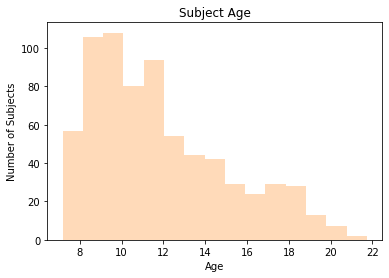

In [109]:
Age = df['Age']
plt.hist(Age,bins=15,color='peachpuff')
plt.title('Subject Age')
plt.xlabel('Age')
plt.ylabel('Number of Subjects')

In [145]:
ndf = df[df['DX'] != 4]
print('ndf = df without pending values')

ndf = df without pending values


In [146]:
pd.unique(ndf['DX'])

array([0, 1, 3, 2])

In [147]:
ADHDdf = ndf[ndf['DX'] != 0]

In [161]:
controldf = ndf[ndf['DX'] == 0]

In [162]:
assert all(controldf['DX']==0),'bad slicing'

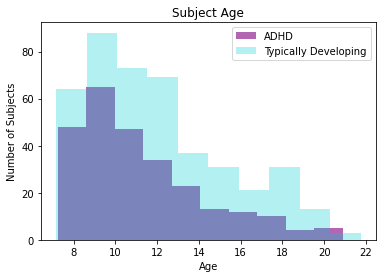

In [175]:
ADHDage = ADHDdf['Age']
plt.hist(ADHDage, alpha=0.6, color = 'purple')
controlage = controldf['Age']
plt.hist(controlage, alpha=0.3, color='darkturquoise')
plt.title('Subject Age')
plt.xlabel('Age')
plt.ylabel('Number of Subjects')
plt.legend(['ADHD', 'Typically Developing'])

In [176]:
femaledf = ndf[ndf['Gender']!=1]
maledf = ndf[ndf['Gender']!=0]

([<matplotlib.axis.XTick at 0x15539c1a12b0>,
 [Text(0, 0, 'Typically Developing'),
  Text(1, 0, 'ADHD-Combined'),
  Text(2, 0, 'ADHD-Hyperactive/Impulsive'),
  Text(3, 0, 'ADHD-Inattentive')])

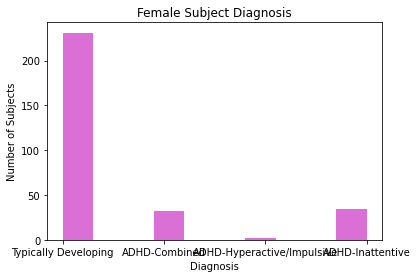

In [177]:
femaleDX = femaledf['DX']
plt.hist(femaleDX, color = 'orchid')
plt.title('Female Subject Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Subjects')
plt.xticks([0,1,2,3],['Typically Developing', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'])

([<matplotlib.axis.XTick at 0x15539c1450d0>,
 [Text(0, 0, 'Typically Developing'),
  Text(1, 0, 'ADHD-Combined'),
  Text(2, 0, 'ADHD-Hyperactive/Impulsive'),
  Text(3, 0, 'ADHD-Inattentive')])

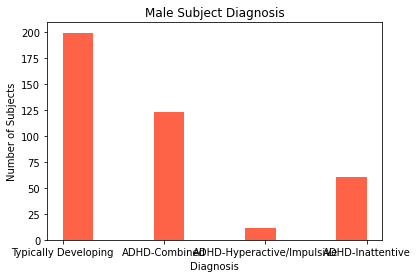

In [178]:
maleDX = maledf['DX']
plt.hist(maleDX, color = 'tomato')
plt.title('Male Subject Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Subjects')
plt.xticks([0,1,2,3],['Typically Developing', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'])

([<matplotlib.axis.XTick at 0x15539c0e8370>,
 [Text(0, 0, 'Typically Developing'),
  Text(1, 0, 'ADHD-Combined'),
  Text(2, 0, 'ADHD-Hyperactive/Impulsive'),
  Text(3, 0, 'ADHD-Inattentive')])

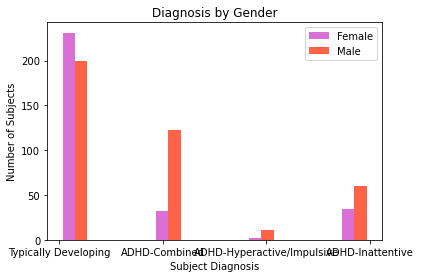

In [179]:
plt.hist([femaleDX,maleDX], color = ['orchid', 'tomato'])
plt.title('Diagnosis by Gender')
plt.xlabel('Subject Diagnosis')
plt.ylabel('Number of Subjects')
plt.legend(['Female','Male'])
plt.xticks([0,1,2,3],['Typically Developing', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'])

In [119]:
print('why isnt this working they shouldnt have the same size bars and how to make labels not overlap')

why isnt this working they shouldnt have the same size bars and how to make labels not overlap


In [23]:
nndf = ndf[ndf['Full4 IQ']>0]
print('nndf = df without pending or -999 values')

nndf = df without pending or -999 values


In [24]:
'IQ: mean = {}, std = {}, range = {}-{}'.format(nndf['Full4 IQ'].mean(), nndf['Full4 IQ'].std(), nndf['Full4 IQ'].min(), nndf['Full4 IQ'].max())

'IQ: mean = 110.59842022116902, std = 13.848102187997139, range = 73.0-144.0'

In [25]:
ADHD1df = nndf[nndf['DX']=='1']
ADHD2df = nndf[nndf['DX']=='2']
ADHD3df = nndf[nndf['DX']=='3']

In [26]:
controliqdf = nndf[nndf['DX']=='0']

In [27]:
type1IQ = ADHD1df['Full4 IQ']
type2IQ = ADHD2df['Full4 IQ']
type3IQ = ADHD3df['Full4 IQ']

In [28]:
controlIQ = controliqdf['Full4 IQ']

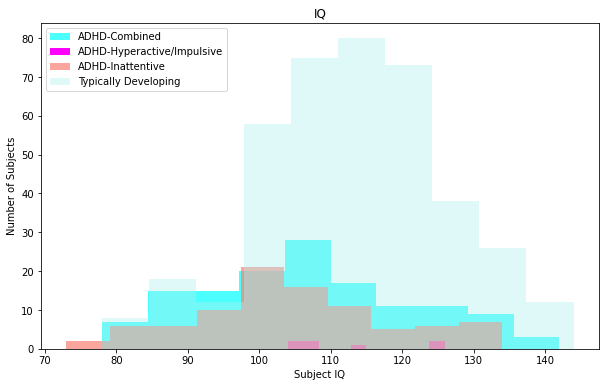

In [192]:
plt.figure(figsize=(10,6))
plt.hist(type1IQ, alpha=0.7, color='cyan')
plt.hist(type2IQ, color='fuchsia')
plt.hist(type3IQ, alpha=0.7, color='salmon')
plt.hist(controlIQ, alpha=0.4, color='paleturquoise')
plt.title('IQ')
plt.xlabel('Subject IQ')
plt.ylabel('Number of Subjects')
plt.legend(['ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive', 'Typically Developing'])

In [30]:
print('1 the legend is covering the whole thing, 2 can barely see the hyperactive-impulsive')

1 the legend is covering the whole thing, 2 can barely see the hyperactive-impulsive
